문제 정의: GPU를 원하는 조건을 검색해서 찾아보기

라이브러리 임포트

In [2]:
# Libraries for reading and handling the data
import numpy
import pandas
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

한글 깨짐 방지

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


데이터 준비하기

In [ ]:
df = pandas.read_csv('All_GPUs.csv')

In [ ]:
df.head(3)

In [ ]:
# bare_nuclei 열의 고유 값 확인
df.Resolution_WxH.unique()

In [ ]:
# 'nan'를 numpy.nan으로 변경
df['Resolution_WxH'].replace('nan', numpy.nan, inplace = True)

In [ ]:
# nan으로 변경된 값을 삭제
df.dropna(subset=['Resolution_WxH'], axis = 0, inplace = True)

In [ ]:
df.info()

In [ ]:
# nan으로 변경된 값을 삭제
df.dropna(subset=['Open_GL'], axis = 0, inplace = True)

In [ ]:
df.info()

In [ ]:
# bare_nuclei 열의 고유 값 확인
df.Core_Speed.unique()

In [ ]:
# 'nan'를 numpy.nan으로 변경
df['Core_Speed'].replace('\n- ', numpy.nan, inplace = True)

In [ ]:
# nan으로 변경된 값을 삭제
df.dropna(subset=['Core_Speed'], axis = 0, inplace = True)

In [ ]:
df.info()

In [13]:
df = pandas.read_csv('realfinal.csv')

In [43]:
df.head(2)

Name  Core_Speed  ...  Texture_Rate RMax_Power
0          GeForce GTS 150         738  ...            47        200
1  Radeon HD 2900 XT 512MB         742  ...            12        300

[2 rows x 22 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2013 non-null   object 
 1   Core_Speed        2013 non-null   int64  
 2   Direct_X          2013 non-null   float64
 3   Integrated        2013 non-null   object 
 4   L2_Cache          2013 non-null   int64  
 5   Manufacturer      2013 non-null   object 
 6   Max_Power         2013 non-null   int64  
 7   Memory            2013 non-null   int64  
 8   Memory_Bandwidth  2013 non-null   float64
 9   Memory_Bus        2013 non-null   int64  
 10  Memory_Speed      2013 non-null   int64  
 11  Memory_Type       2013 non-null   object 
 12  Open_GL           2013 non-null   float64
 13  Pixel_Rate        2013 non-null   int64  
 14  Process           2013 non-null   int64  
 15  ROPs              2013 non-null   int64  
 16  Resolution_WxH    2013 non-null   object 


In [18]:
df['Direct_X'] = df['Direct_X'].astype('int64')
df['Direct_X'] = df['Direct_X'].astype('object')

In [19]:
df['Direct_X'].unique()

array([10, 11, 12, 9], dtype=object)

In [21]:
onehot_in = pandas.get_dummies(df[['Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire']])
onehot_in

Direct_X_9  Direct_X_10  ...  SLI_Crossfire_No  SLI_Crossfire_Yes
0              0            1  ...                 0                  1
1              0            1  ...                 0                  1
2              0            1  ...                 0                  1
3              0            1  ...                 0                  1
4              0            1  ...                 0                  1
...          ...          ...  ...               ...                ...
2008           0            0  ...                 1                  0
2009           0            0  ...                 1                  0
2010           0            0  ...                 1                  0
2011           0            0  ...                 1                  0
2012           0            0  ...                 1                  0

[2013 rows x 23 columns]

In [22]:
df = pandas.concat([df, onehot_in], axis = 1)
df.head(3)

Name  Core_Speed  ... SLI_Crossfire_No SLI_Crossfire_Yes
0          GeForce GTS 150         738  ...                0                 1
1  Radeon HD 2900 XT 512MB         742  ...                0                 1
2       Radeon HD 2900 Pro         600  ...                0                 1

[3 rows x 45 columns]

In [23]:
# 기존 컬럼 삭제
df.drop(['Name', 'Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire', 'Max_Power'], axis = 1, inplace = True) 
df.head(3)

Core_Speed  L2_Cache  ...  SLI_Crossfire_No  SLI_Crossfire_Yes
0         738         0  ...                 0                  1
1         742         0  ...                 0                  1
2         600         0  ...                 0                  1

[3 rows x 38 columns]

In [24]:
# df -> X,y (문제집, 정답지)
X = df[['Core_Speed',	'L2_Cache',	'Memory',	'Memory_Bandwidth',	'Memory_Bus',	'Memory_Speed',	'Open_GL',	'Pixel_Rate',	'Process',	'ROPs',	'Shader',	'TMUs',	'Texture_Rate',	'Direct_X_9',	'Direct_X_10',	'Direct_X_11',	'Direct_X_12',	'Integrated_No',	'Integrated_Yes',	'Manufacturer_AMD',	'Manufacturer_ATI',	'Manufacturer_Intel',	'Manufacturer_Nvidia',	'Memory_Type_DDR',	'Memory_Type_DDR2',	'Memory_Type_DDR3',	'Memory_Type_GDDR2',	'Memory_Type_GDDR3',	'Memory_Type_GDDR4',	'Memory_Type_GDDR5',	'Memory_Type_GDDR5X',	'Memory_Type_HBM-1',	'Memory_Type_HBM-2',	'Memory_Type_eDRAM',	'SLI_Crossfire_No',	'SLI_Crossfire_Yes']]  # 독립변수
y = df['RMax_Power']

In [26]:
X

Core_Speed  L2_Cache  ...  SLI_Crossfire_No  SLI_Crossfire_Yes
0            738         0  ...                 0                  1
1            742         0  ...                 0                  1
2            600         0  ...                 0                  1
3            800         0  ...                 0                  1
4            800         0  ...                 0                  1
...          ...       ...  ...               ...                ...
2008         954       128  ...                 1                  0
2009         810       128  ...                 1                  0
2010         797       128  ...                 1                  0
2011         954       128  ...                 1                  0
2012         954       128  ...                 1                  0

[2013 rows x 36 columns]

In [29]:
# train 데이터와 test 데이터로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

print(X_train.shape)
print(X_test.shape)

(1409, 36)
(604, 36)


In [ ]:
# 설명 변수(데이터, 문제집) 정규화(normalization)...스케일 조정... 0~1 사이의 작은 값으로 축소

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.90969982, -1.03383007, -0.81076509, ..., -0.0222939 ,
        -0.6984303 ,  0.6984303 ],
       [-0.89426038, -1.03383007, -0.99283703, ..., -0.0222939 ,
        -0.6984303 ,  0.6984303 ],
       [-1.44236052, -1.03383007, -0.99283703, ..., -0.0222939 ,
        -0.6984303 ,  0.6984303 ],
       ...,
       [-0.68196807, -0.897766  , -0.81076509, ..., -0.0222939 ,
         1.43178211, -1.43178211],
       [-0.07597002, -0.897766  , -0.44662121, ..., -0.0222939 ,
         1.43178211, -1.43178211],
       [-0.07597002, -0.897766  , -0.44662121, ..., -0.0222939 ,
         1.43178211, -1.43178211]])

머신러닝 모델 구축 - 1) LogisticRegression

In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 정확도 확인
print('Train data Score: ', log_reg.score(X_train, y_train))
print('Test data Score: ', log_reg.score(X_test, y_test))

Train data Score:  0.8140525195173882
Test data Score:  0.7897350993377483


머신러닝 모델 구축 - 2) Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth = 10,
                              min_samples_leaf = 20,
                              min_samples_split = 40).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ', tree.score(X_train, y_train))
print('Test data Score: ', tree.score(X_test, y_test))

Train data Score:  0.8353442157558553
Test data Score:  0.8394039735099338


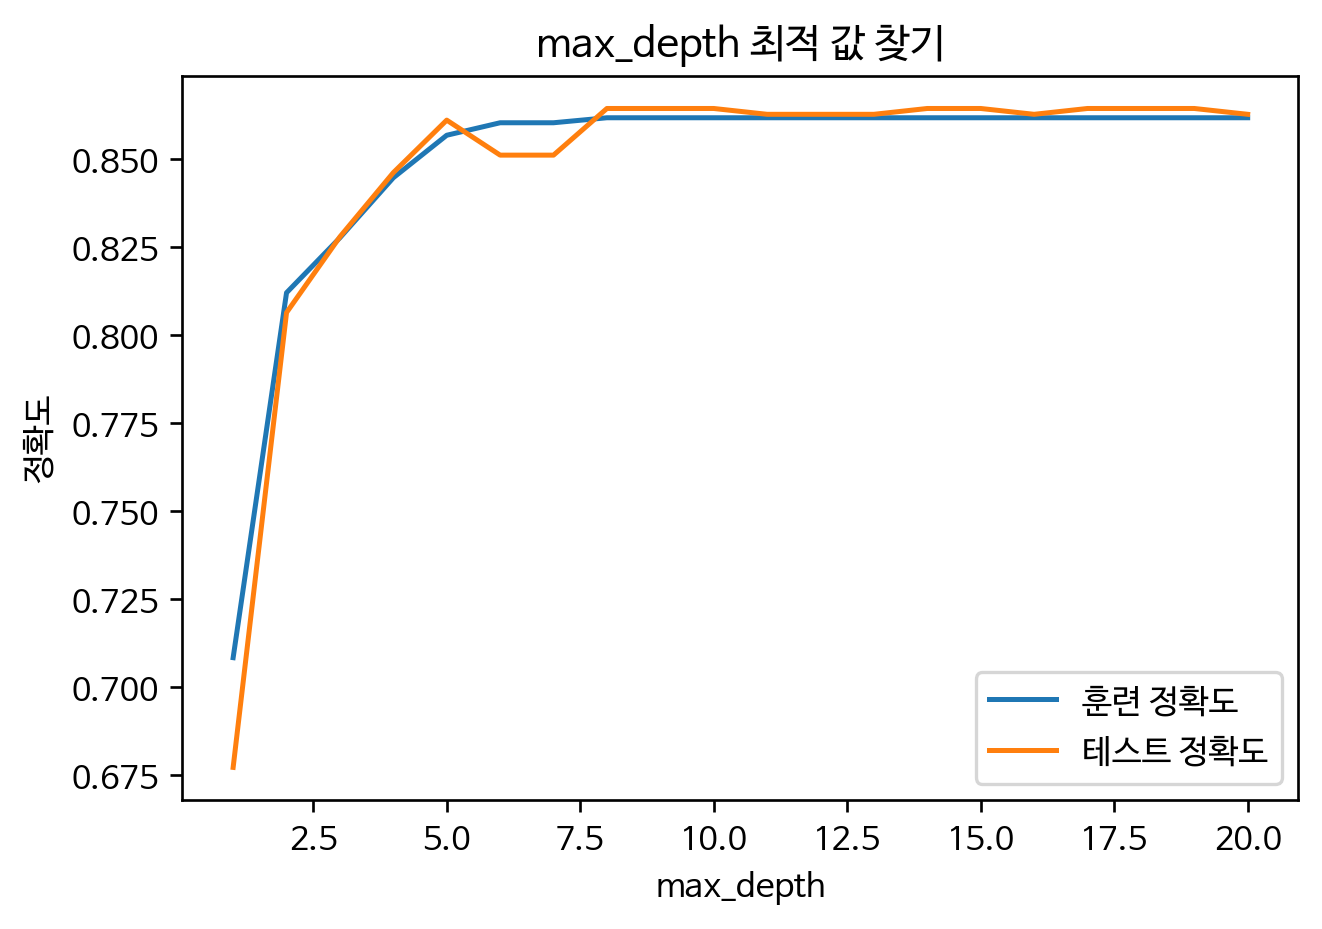

In [ ]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 1 에서 20 까지 max_depth 를 적용
max_depth_settings = range(1, 21)

for max_depth in max_depth_settings:
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth = max_depth,
                              min_samples_leaf = 20,
                              min_samples_split = 40)
    tree.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tree.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tree.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('max_depth 최적 값 찾기')
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("max_depth")
plt.legend()
plt.show()

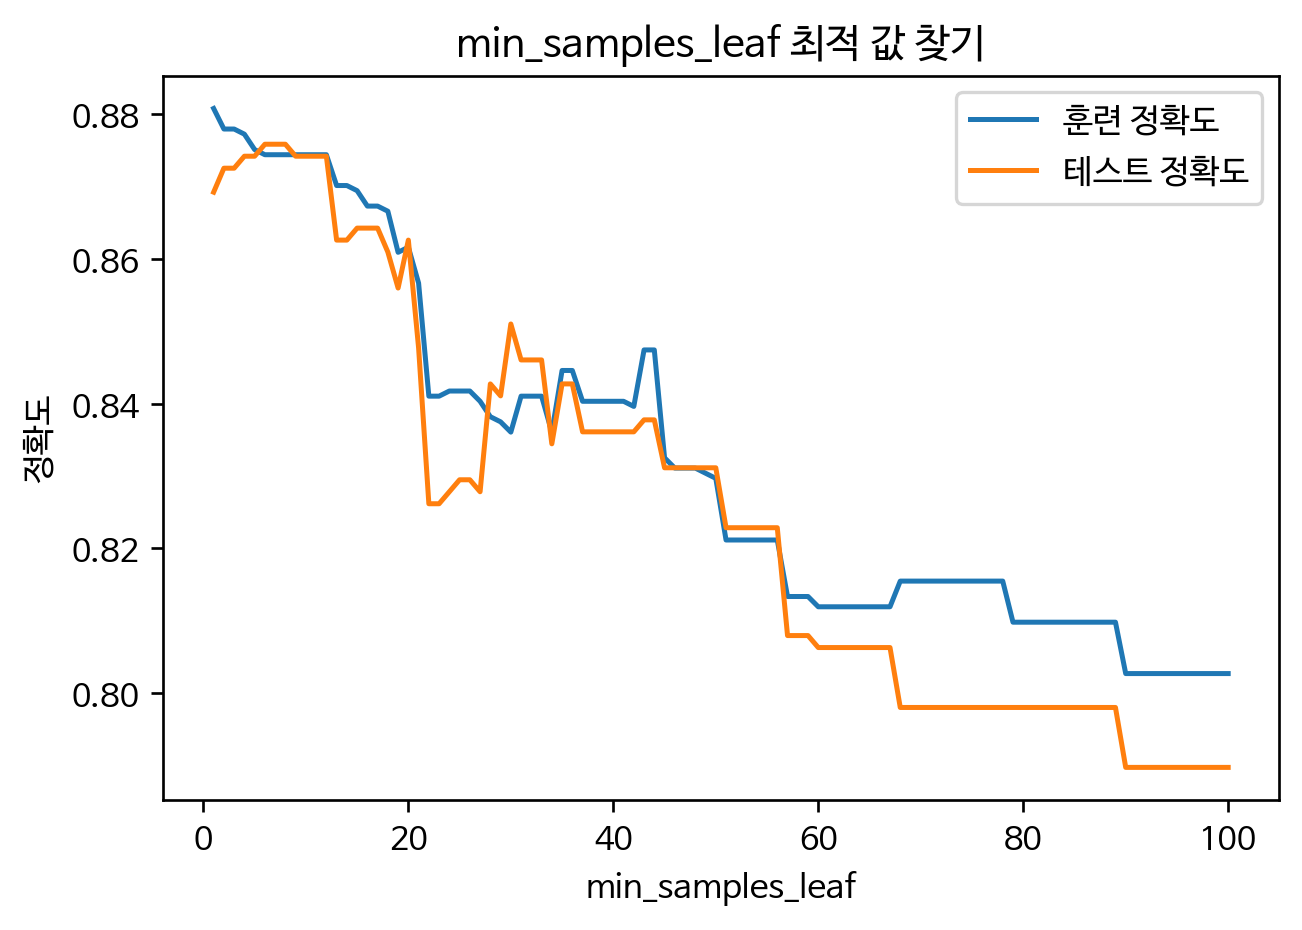

In [ ]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 1 에서 100 까지 min_samples_leaf 를 적용
min_samples_leaf_settings = range(1, 101)

for min_samples_leaf in min_samples_leaf_settings:
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth = 10,
                              min_samples_leaf = min_samples_leaf,
                              min_samples_split = 40)
    tree.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tree.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tree.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('min_samples_leaf 최적 값 찾기')
plt.plot(min_samples_leaf_settings, training_accuracy, label="훈련 정확도")
plt.plot(min_samples_leaf_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("min_samples_leaf")
plt.legend()
plt.show()

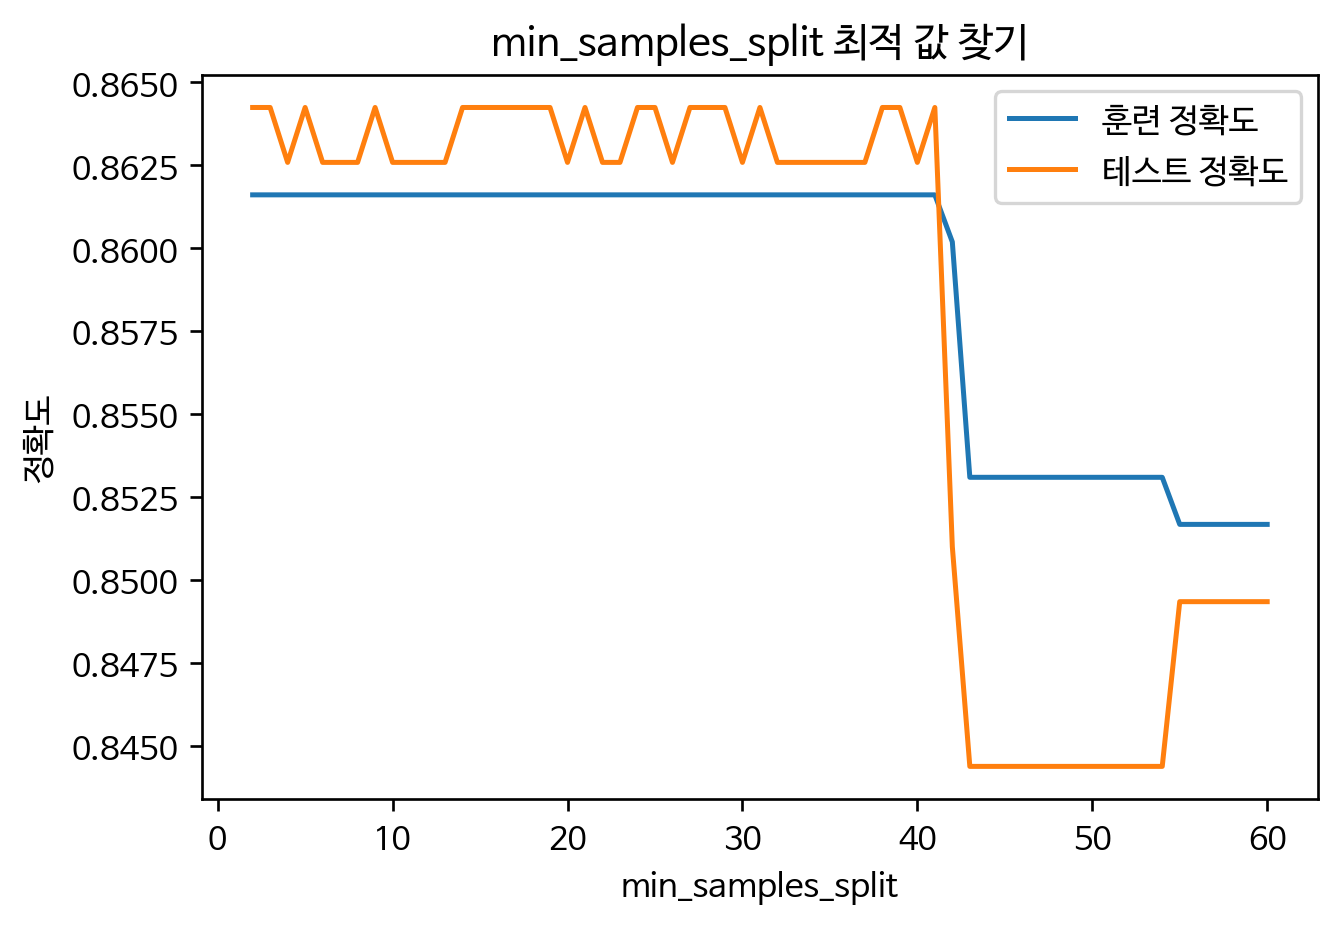

In [ ]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 2 에서 60 까지 max_depth 를 적용
min_samples_split_settings = range(2, 61)

for min_samples_split in min_samples_split_settings:
    # 모델 생성
    tree = DecisionTreeClassifier(max_depth = 10,
                              min_samples_leaf = 20,
                              min_samples_split = min_samples_split)
    tree.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tree.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tree.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('min_samples_split 최적 값 찾기')
plt.plot(min_samples_split_settings, training_accuracy, label="훈련 정확도")
plt.plot(min_samples_split_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("min_samples_split")
plt.legend()
plt.show()

머신러닝 모델 구축 - 3) GradientBoostingClassifier

In [ ]:
boost = GradientBoostingClassifier(max_depth = 5,
                                  learning_rate = 0.01).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ', boost.score(X_train, y_train))
print('Test data Score: ', boost.score(X_test, y_test))

Train data Score:  0.9616749467707594
Test data Score:  0.9006622516556292


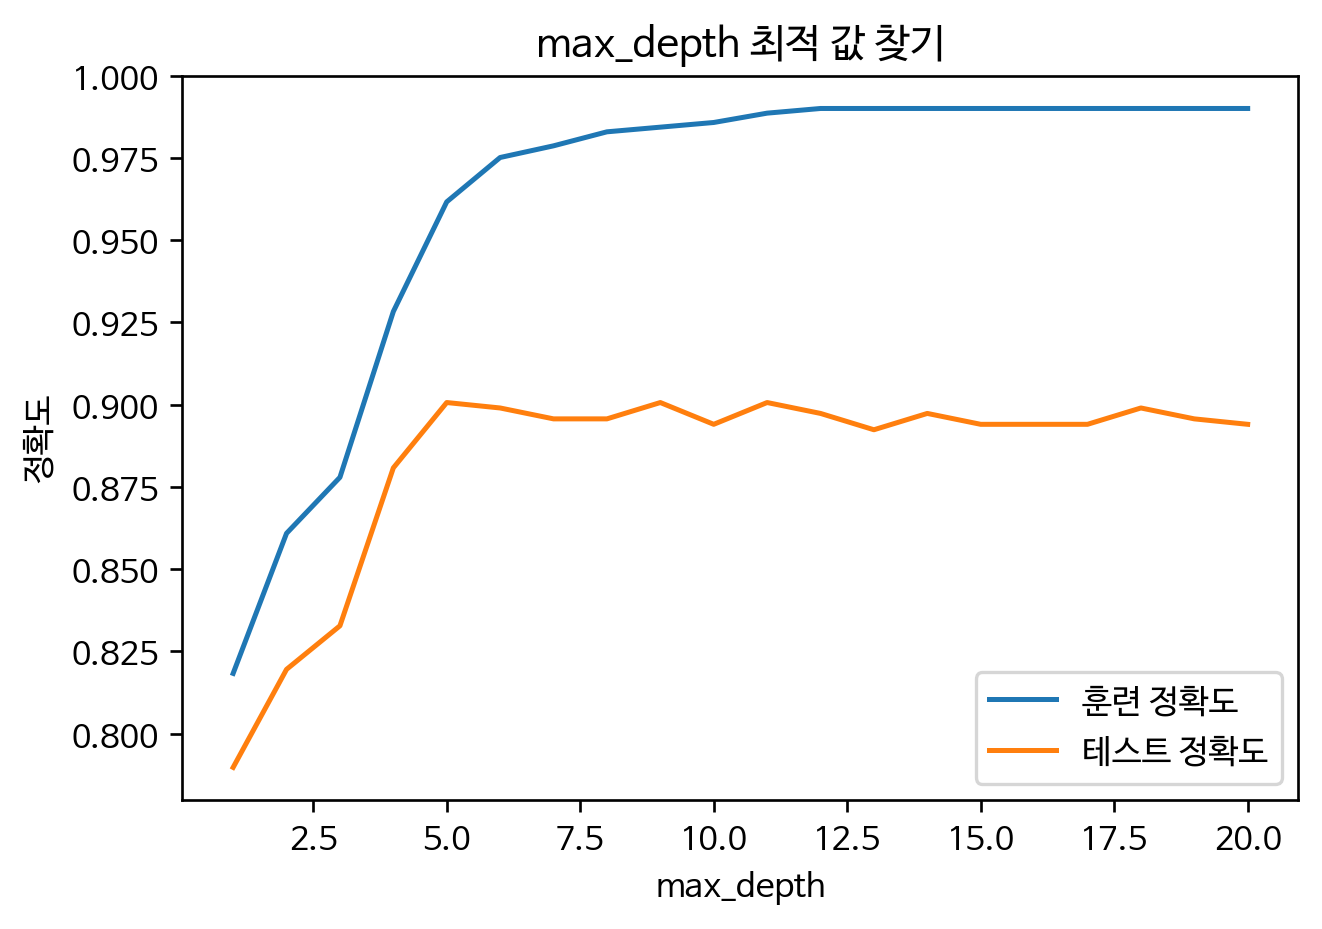

In [ ]:
# 최적의 값 찾기
training_accuracy = []
test_accuracy = []
# 1 에서 20 까지 max_depth 를 적용
max_depth_settings = range(1, 21)

for max_depth in max_depth_settings:
    # 모델 생성
    boost = GradientBoostingClassifier(max_depth = max_depth,
                                  learning_rate = 0.01)
    boost.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(boost.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(boost.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('max_depth 최적 값 찾기')
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("max_depth")
plt.legend()
plt.show()

머신러닝 모델 구축 - 4) RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators = 300,
                                random_state = 0).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ', random.score(X_train, y_train))
print('Test data Score: ', random.score(X_test, y_test))

Train data Score:  0.9900638750887154
Test data Score:  0.9155629139072847


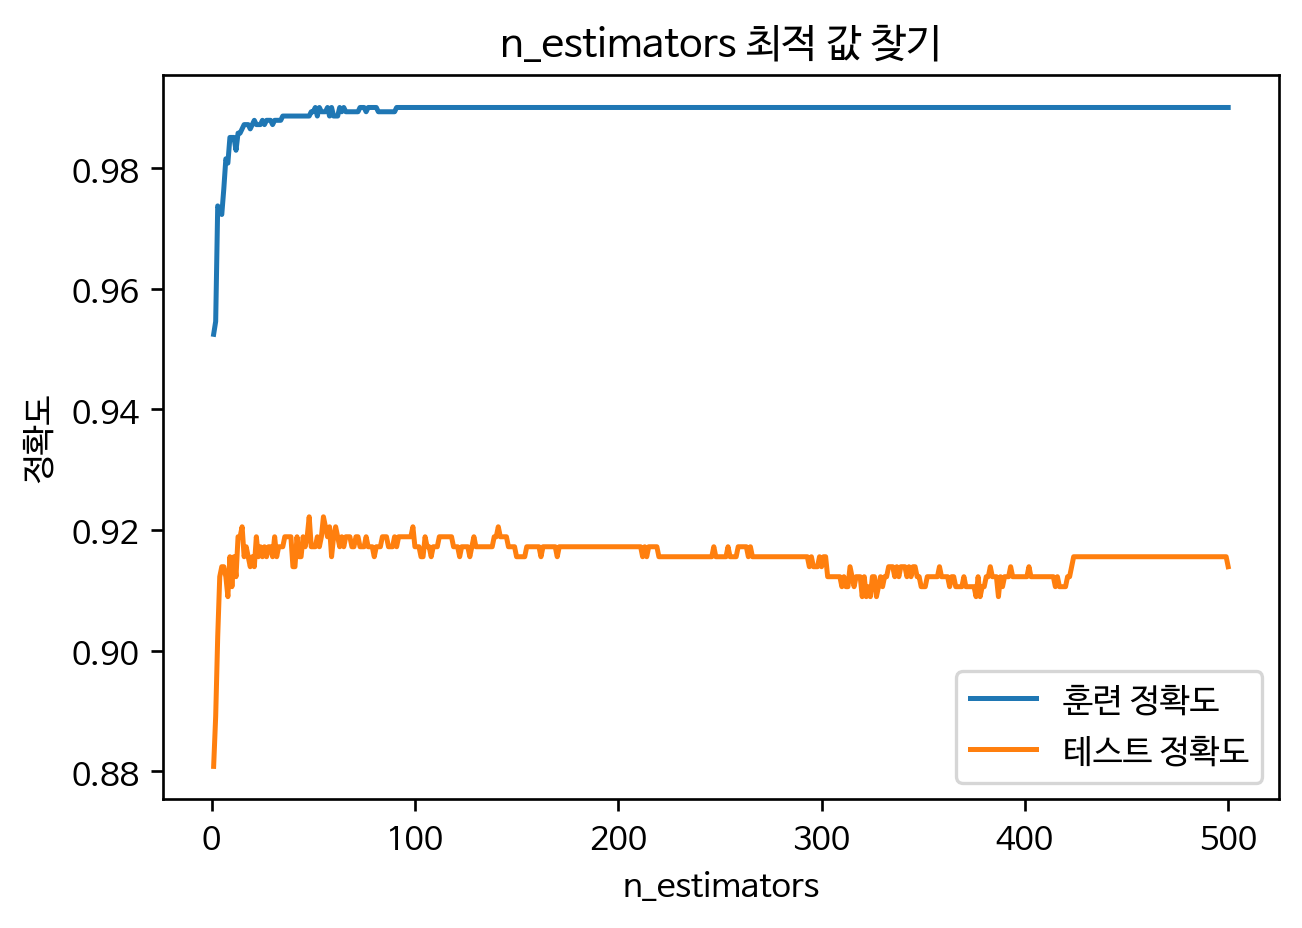

In [ ]:
training_accuracy = []
test_accuracy = []
# 1 에서 500 까지 n_estimators 를 적용
n_estimators_settings = range(1, 501)

for n_estimators in n_estimators_settings:
    # 모델 생성
    random = RandomForestClassifier(n_estimators = n_estimators, random_state = 0)
    random.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(random.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(random.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('n_estimators 최적 값 찾기')
plt.plot(n_estimators_settings, training_accuracy, label="훈련 정확도")
plt.plot(n_estimators_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

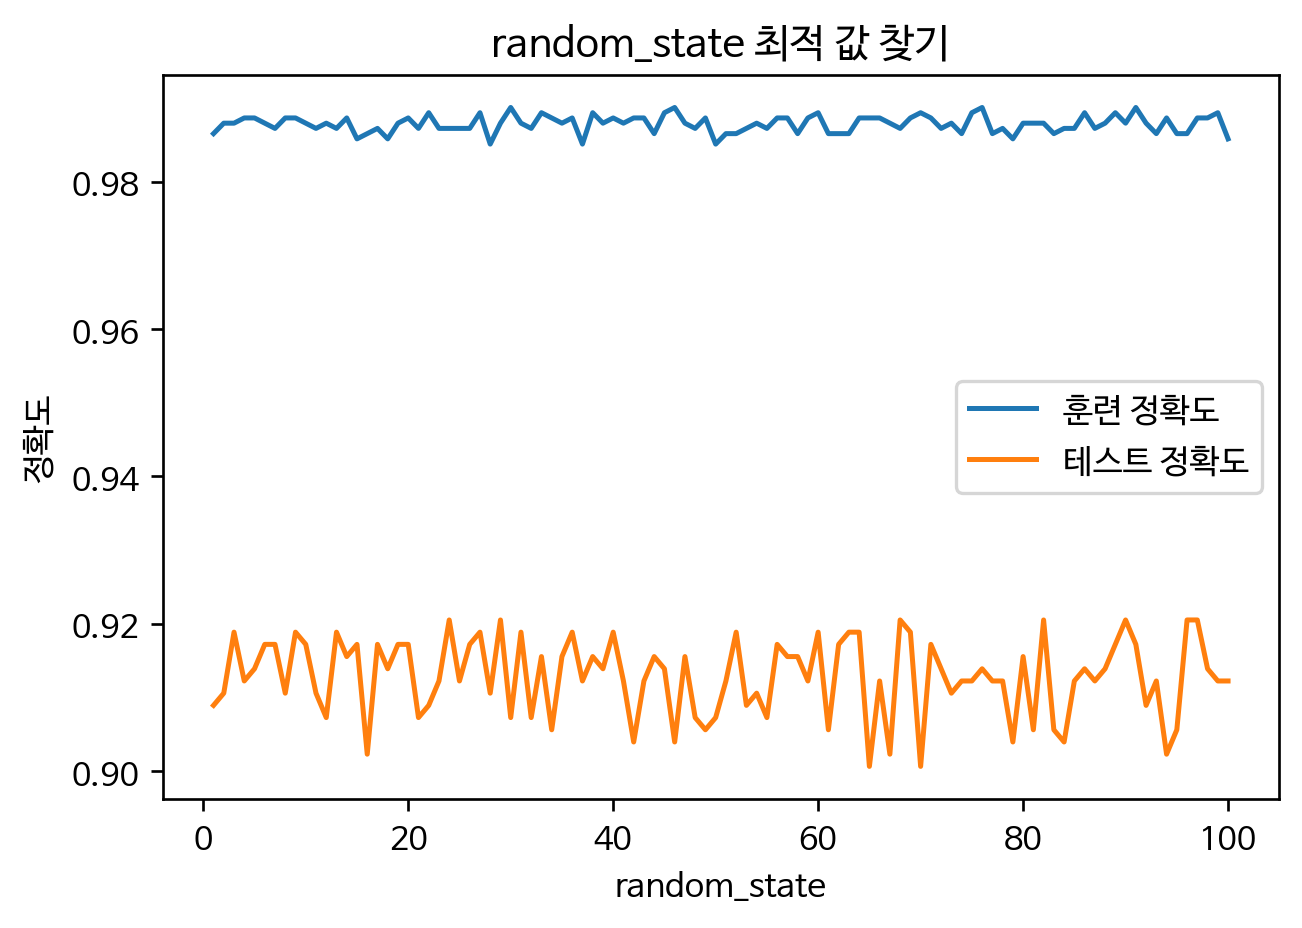

In [ ]:
training_accuracy = []
test_accuracy = []
# 1 에서 100 까지 random_state 를 적용
random_state_settings = range(1, 101)

for random_state in random_state_settings:
    # 모델 생성
    random = RandomForestClassifier(n_estimators = 20, random_state = random_state)
    random.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(random.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(random.score(X_test, y_test))

plt.figure(dpi = 120)
plt.rc('font', family ='NanumBarunGothic')
plt.title('random_state 최적 값 찾기')
plt.plot(random_state_settings, training_accuracy, label="훈련 정확도")
plt.plot(random_state_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("random_state")
plt.legend()
plt.show()

In [ ]:
df['RMax_Power'].unique()

array([200, 300, 100, 400, 500, 800, 600, 700])

In [ ]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat)[0] )

Logistic Regression 평가 지표
              precision    recall  f1-score   support

         100       0.86      0.94      0.90       251
         200       0.78      0.76      0.77       207
         300       0.77      0.67      0.71       112
         400       0.24      0.24      0.24        17
         500       0.67      0.40      0.50        10
         600       0.25      0.17      0.20         6
         700       0.00      0.00      0.00         0
         800       0.00      0.00      0.00         1

    accuracy                           0.79       604
   macro avg       0.44      0.40      0.41       604
weighted avg       0.79      0.79      0.79       604

accuracy 0.7897350993377483


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

성능평가 - ROC 커브

In [ ]:
# 으아아ㅏ아아라ㅏ랑가랑ㄱ락ㄹ

(604, 36)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)   # 조건을 아예 먹여버림
plt.rcParams['figure.dpi'] = 120

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


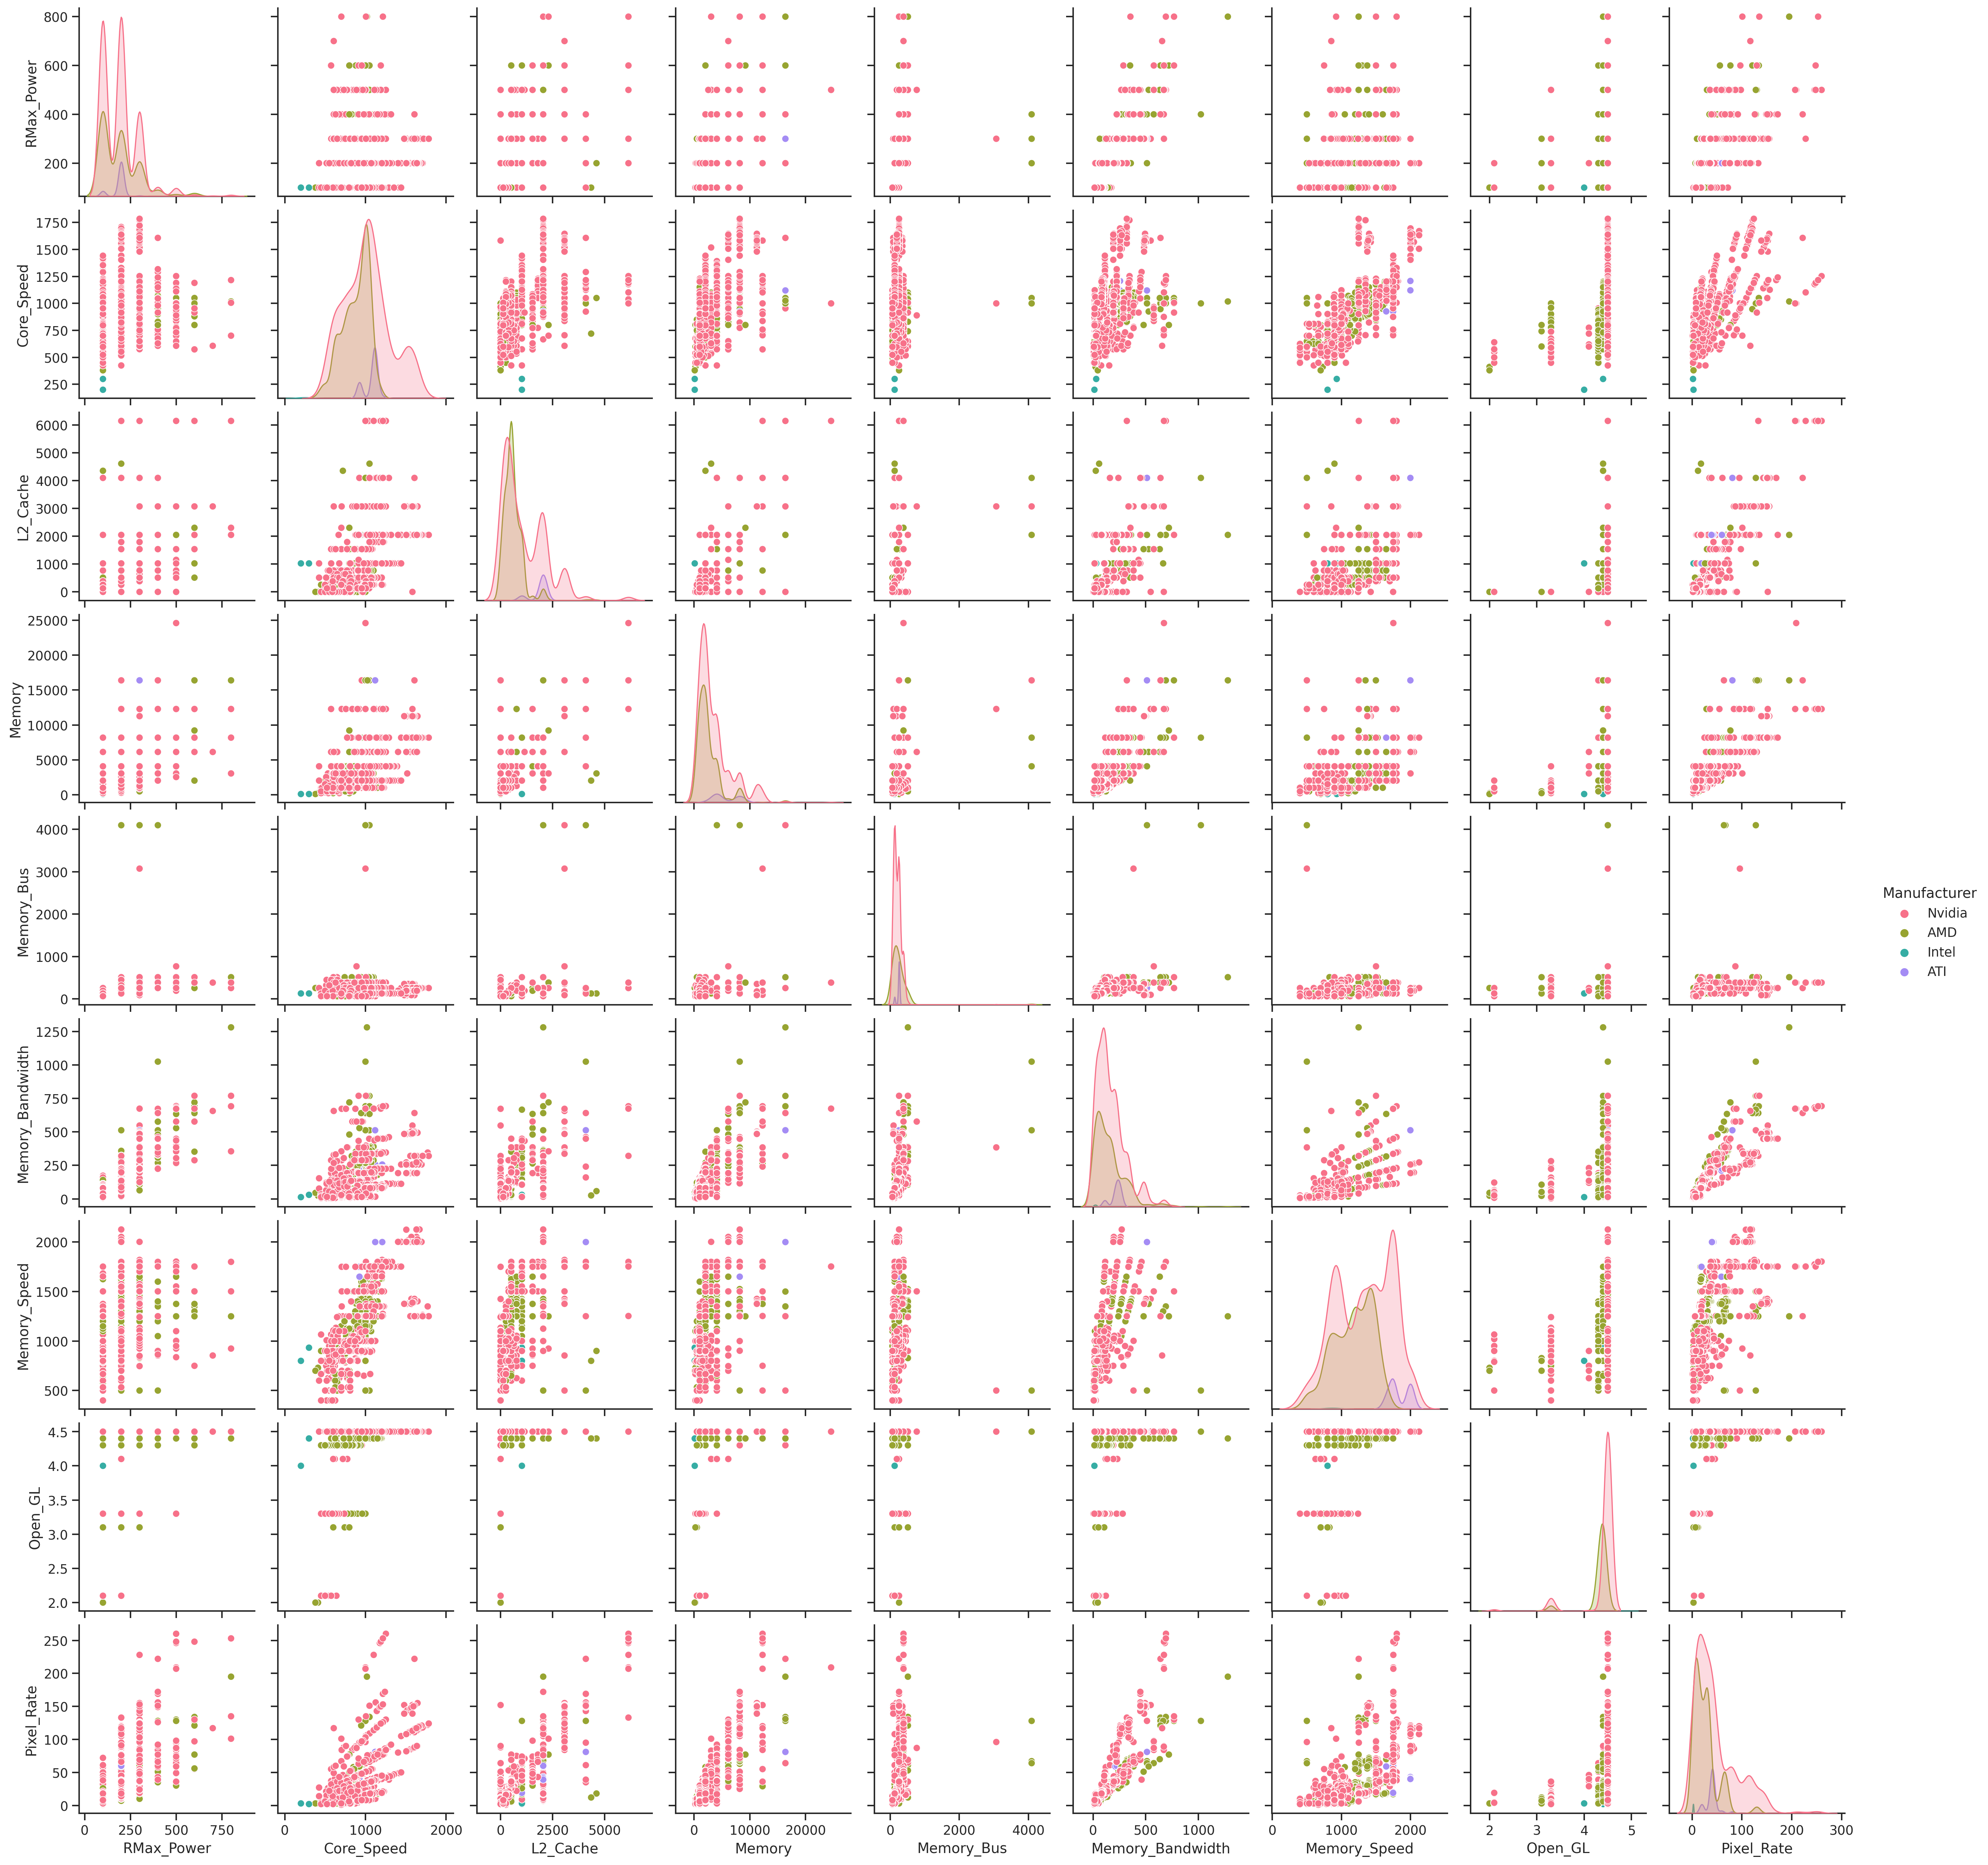

In [12]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="Manufacturer", palette="husl")

In [5]:
df = df[['RMax_Power', 'Core_Speed', 'L2_Cache', 'Memory', 'Memory_Bus', 'Memory_Bandwidth', 'Memory_Speed', 'Open_GL', 'Pixel_Rate', 'Manufacturer']]

In [ ]:
https://wikidocs.net/35476

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RMax_Power        2013 non-null   int64  
 1   Core_Speed        2013 non-null   int64  
 2   L2_Cache          2013 non-null   int64  
 3   Memory            2013 non-null   int64  
 4   Memory_Bus        2013 non-null   int64  
 5   Memory_Bandwidth  2013 non-null   float64
 6   Memory_Speed      2013 non-null   int64  
 7   Open_GL           2013 non-null   float64
 8   Pixel_Rate        2013 non-null   int64  
 9   Manufacturer      2013 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 157.4+ KB


In [44]:
df = pandas.read_csv('realfinal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2013 non-null   object 
 1   Core_Speed        2013 non-null   int64  
 2   Direct_X          2013 non-null   float64
 3   Integrated        2013 non-null   object 
 4   L2_Cache          2013 non-null   int64  
 5   Manufacturer      2013 non-null   object 
 6   Max_Power         2013 non-null   int64  
 7   Memory            2013 non-null   int64  
 8   Memory_Bandwidth  2013 non-null   float64
 9   Memory_Bus        2013 non-null   int64  
 10  Memory_Speed      2013 non-null   int64  
 11  Memory_Type       2013 non-null   object 
 12  Open_GL           2013 non-null   float64
 13  Pixel_Rate        2013 non-null   int64  
 14  Process           2013 non-null   int64  
 15  ROPs              2013 non-null   int64  
 16  Resolution_WxH    2013 non-null   object 


In [45]:
df = pandas.read_csv('realfinal.csv')

df['Direct_X'] = df['Direct_X'].astype('int64')
df['Direct_X'] = df['Direct_X'].astype('object')

onehot_in = pandas.get_dummies(df[['Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire']])

df = pandas.concat([df, onehot_in], axis = 1)

df.drop(['Name', 'Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire', 'Max_Power'], axis = 1, inplace = True) 

X = df[['Core_Speed',	'L2_Cache',	'Memory',	'Memory_Bandwidth',	'Memory_Bus',	'Memory_Speed',	'Open_GL',	'Pixel_Rate',	'Process',	'ROPs',	'Shader',	'TMUs',	'Texture_Rate',	'Direct_X_9',	'Direct_X_10',	'Direct_X_11',	'Direct_X_12',	'Integrated_No',	'Integrated_Yes',	'Manufacturer_AMD',	'Manufacturer_ATI',	'Manufacturer_Intel',	'Manufacturer_Nvidia',	'Memory_Type_DDR',	'Memory_Type_DDR2',	'Memory_Type_DDR3',	'Memory_Type_GDDR2',	'Memory_Type_GDDR3',	'Memory_Type_GDDR4',	'Memory_Type_GDDR5',	'Memory_Type_GDDR5X',	'Memory_Type_HBM-1',	'Memory_Type_HBM-2',	'Memory_Type_eDRAM',	'SLI_Crossfire_No',	'SLI_Crossfire_Yes']]  # 독립변수
y = df['RMax_Power']

# train 데이터와 test 데이터로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

print(X_train.shape)
print(X_test.shape)

# 설명 변수(데이터, 문제집) 정규화(normalization)...스케일 조정... 0~1 사이의 작은 값으로 축소

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

(1409, 36)
(604, 36)


In [57]:
model = Sequential()
model.add(Dense(32, input_dim = 36, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) # == 'acc'

history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 64)

Epoch 1/100
23/23 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/100
23/23 [=================

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f201d95d440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [50]:
print(X_train.info())
print('=' * 30)
print(y_train)
print('=' * 30)
print(X_test.info())
print('=' * 30)
print(y_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 1210 to 175
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Core_Speed           1409 non-null   int64  
 1   L2_Cache             1409 non-null   int64  
 2   Memory               1409 non-null   int64  
 3   Memory_Bandwidth     1409 non-null   float64
 4   Memory_Bus           1409 non-null   int64  
 5   Memory_Speed         1409 non-null   int64  
 6   Open_GL              1409 non-null   float64
 7   Pixel_Rate           1409 non-null   int64  
 8   Process              1409 non-null   int64  
 9   ROPs                 1409 non-null   int64  
 10  Shader               1409 non-null   float64
 11  TMUs                 1409 non-null   int64  
 12  Texture_Rate         1409 non-null   int64  
 13  Direct_X_9           1409 non-null   uint8  
 14  Direct_X_10          1409 non-null   uint8  
 15  Direct_X_11          1409 non-null  

In [51]:
print(list(y))

[200, 300, 200, 100, 100, 200, 200, 200, 300, 300, 200, 100, 300, 300, 400, 400, 400, 400, 300, 500, 300, 300, 300, 500, 300, 300, 400, 300, 300, 300, 300, 300, 300, 100, 100, 300, 300, 400, 200, 200, 200, 200, 200, 200, 200, 300, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 100, 100, 200, 200, 100, 100, 100, 200, 100, 200, 100, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,

In [58]:
df = pandas.read_csv('realfinal.csv')

df['Direct_X'] = df['Direct_X'].astype('int64')
df['Direct_X'] = df['Direct_X'].astype('object')

onehot_in = pandas.get_dummies(df[['Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire']])

df = pandas.concat([df, onehot_in], axis = 1)

df.drop(['Name', 'Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire', 'Max_Power'], axis = 1, inplace = True) 

X = df[['Core_Speed',	'L2_Cache',	'Memory',	'Memory_Bandwidth',	'Memory_Bus',	'Memory_Speed',	'Open_GL',	'Pixel_Rate',	'Process',	'ROPs',	'Shader',	'TMUs',	'Texture_Rate',	'Direct_X_9',	'Direct_X_10',	'Direct_X_11',	'Direct_X_12',	'Integrated_No',	'Integrated_Yes',	'Manufacturer_AMD',	'Manufacturer_ATI',	'Manufacturer_Intel',	'Manufacturer_Nvidia',	'Memory_Type_DDR',	'Memory_Type_DDR2',	'Memory_Type_DDR3',	'Memory_Type_GDDR2',	'Memory_Type_GDDR3',	'Memory_Type_GDDR4',	'Memory_Type_GDDR5',	'Memory_Type_GDDR5X',	'Memory_Type_HBM-1',	'Memory_Type_HBM-2',	'Memory_Type_eDRAM',	'SLI_Crossfire_No',	'SLI_Crossfire_Yes']]  # 독립변수
y = df['RMax_Power']

In [60]:
# 숫자의 수와 차이가 크기 때문에 정규화 작업이 필요합니다. 
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [61]:
# 검증 데이터셋을 만듭니다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=777) # 랜덤 추출 값


In [62]:
# 검증 데이터셋을 만듭니다
from sklearn.model_selection import  train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,             # 독립 변수
                                                   y_train,            # 종속변수
                                                   test_size=0.33,     # 검증 33%
                                                   random_state=777)   # 랜덤 추출 값

# !!! 데이터 수가 부족하면 validation 안 해도 됨!!!

In [63]:
import numpy as np
np.set_printoptions(suppress=True)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [64]:
import numpy as np
np.set_printoptions(suppress=True)

print(X_train[0])

[-0.68196807 -0.897766   -0.81076509 -0.8990646  -0.64870256 -0.12027204
  0.37512859 -0.87363756 -0.24805475 -0.62650223  0.25314938 -1.07894876
 -0.91316175 -0.03153617 -0.26167028 -0.32283712  0.43556436  0.03863337
 -0.03863337 -0.70315864 -0.19259876 -0.03153617  0.76243295 -0.0222939
 -0.09761448 -0.42827738 -0.03863337 -0.2250029  -0.03863337  0.59092784
 -0.2007737  -0.0499003  -0.03153617 -0.0222939   1.43178211 -1.43178211]


In [65]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)
print(X_train.shape, X_val.shape)

(944, 36) (944,)
(604, 36) (604,)
(465, 36) (465,)
(944, 36) (465, 36)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#model.add(Dense(activation='relu', input_shape=(7,)))

model.add(Dense(32, activation='relu', input_shape=(36,)))
model.add(Dense(1)) # 하나의 값을 출력 -> 신장 길이

# 활성화 함수를 안 적은 이유는 리니어가 디폴트이기 때문에 안 적어도 작동 됨

In [67]:
# 실제 신장: mae
# mse : 스케어
model.compile(optimizer = 'adam', loss='mse', metrics=['mae', 'mse'])

In [70]:
history = model.fit(X_train, y_train,
                    epochs=300,   # 몇 번 공부시킬건지?
                    validation_data = (X_val, y_val)) # 어떻게 나눠서 공부시킬건지?

Epoch 1/300
30/30 [==============================] - 0s 3ms/step - loss: 9702.6006 - mae: 79.5979 - mse: 9702.6006 - val_loss: 9107.9277 - val_mae: 77.9326 - val_mse: 9107.9277
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 9204.3008 - mae: 77.1714 - mse: 9204.3008 - val_loss: 8630.6582 - val_mae: 75.4462 - val_mse: 8630.6582
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 8738.3887 - mae: 74.7614 - mse: 8738.3887 - val_loss: 8171.4263 - val_mae: 72.9619 - val_mse: 8171.4263
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 8299.0986 - mae: 72.4260 - mse: 8299.0986 - val_loss: 7762.2705 - val_mae: 70.6253 - val_mse: 7762.2705
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 7890.3145 - mae: 70.0998 - mse: 7890.3145 - val_loss: 7364.9502 - val_mae: 68.3040 - val_mse: 7364.9502
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 7501.8516 - mae: 67.7795 - mse: 7501.8516 

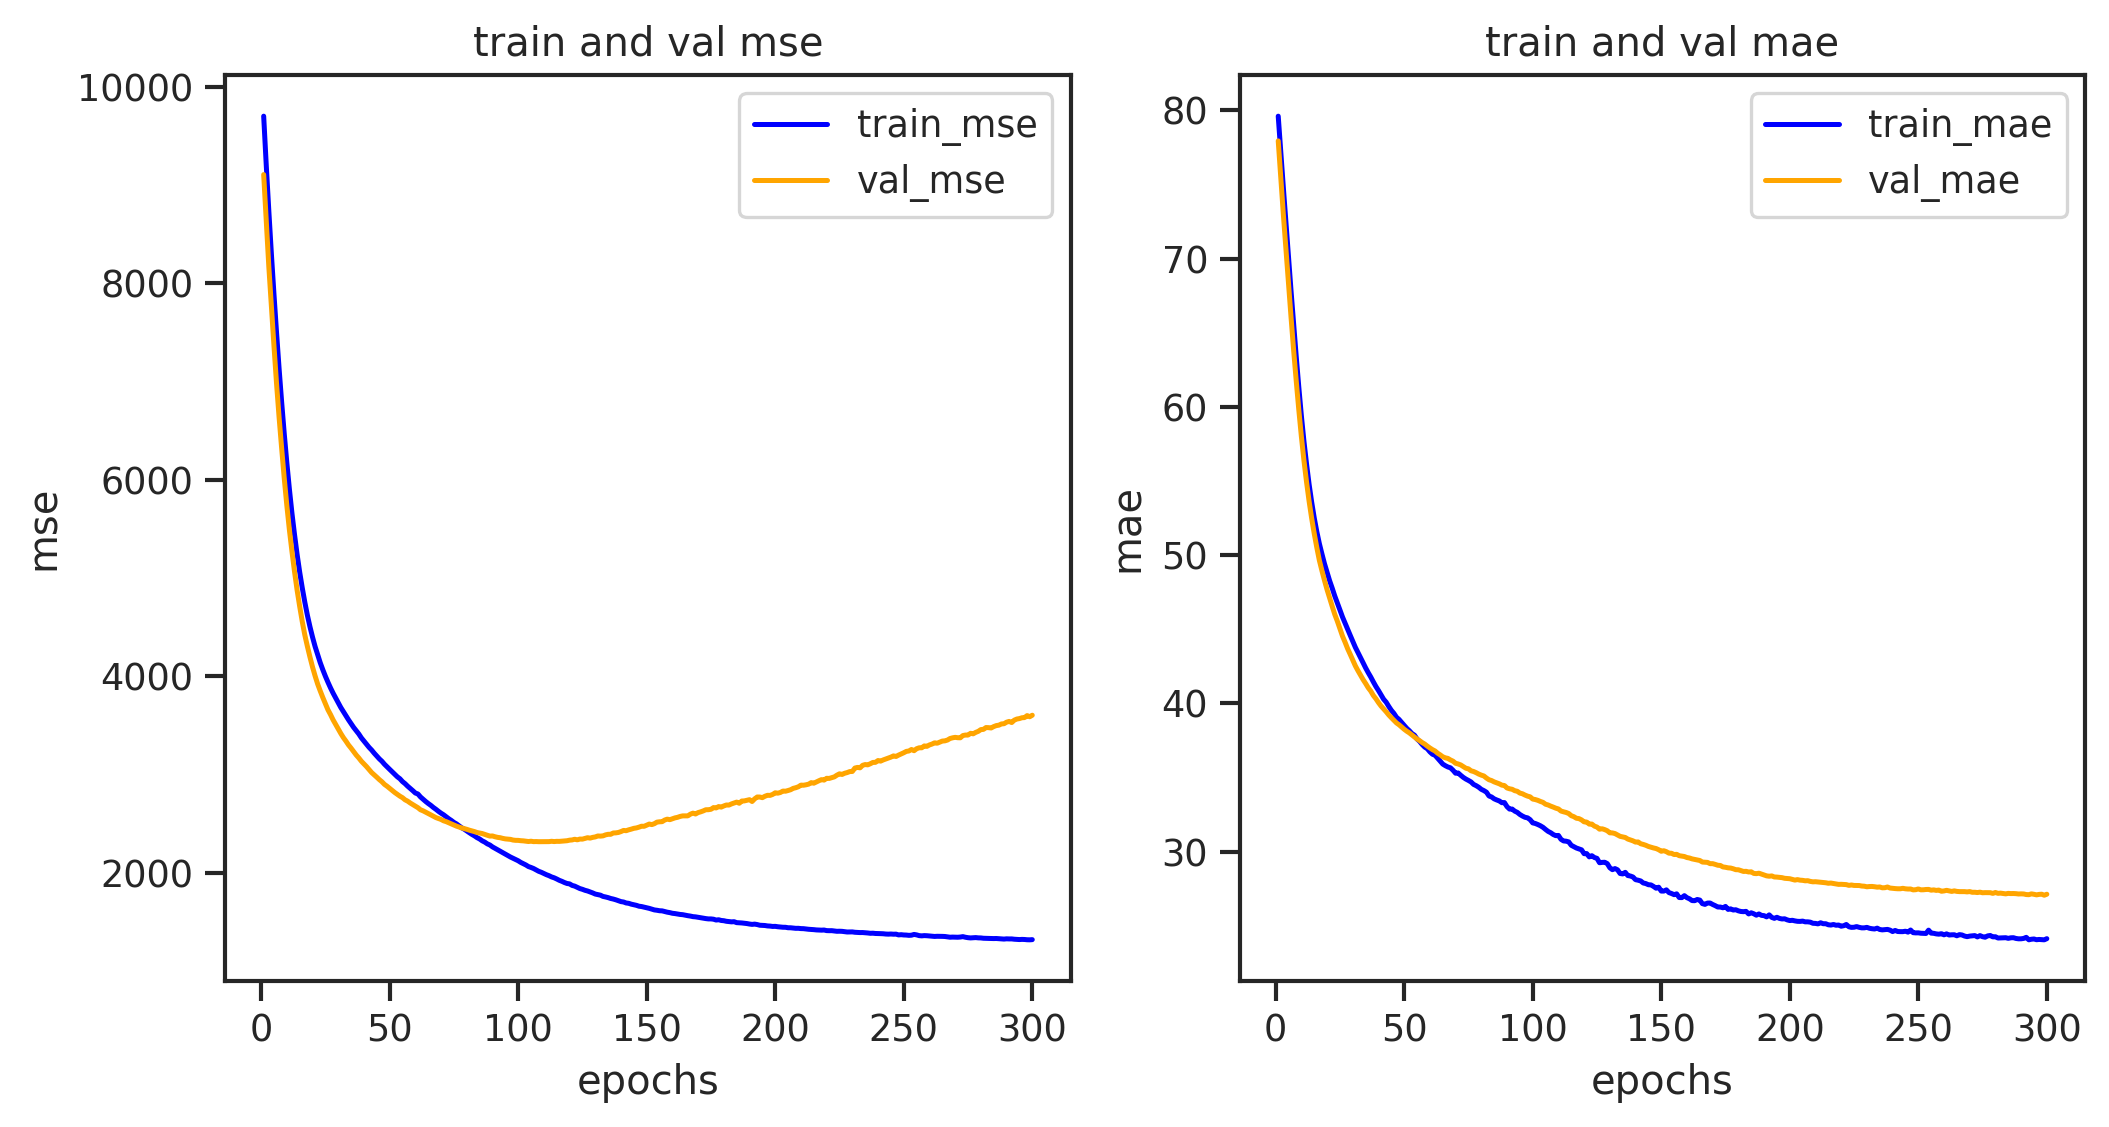

In [79]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5), dpi = 120)

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

In [80]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 1ms/step - loss: 1632.5027 - mae: 26.4805 - mse: 1632.5027


[1632.502685546875, 26.48050308227539, 1632.502685546875]